In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from skfeature.function.similarity_based import fisher_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/home/mert/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mert/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/mert/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")
print(data.columns)

Index(['btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume',
       'btc_trade_count', 'btc_vwap', 'year', 'month', 'dayofmonth',
       'dayofyear', 'weekday', 'date', 'wntr_month', 'month_label', 'quarter',
       'season', 'days', 'rolling_30', 'btc_vwap_lag_1', 'btc_vwap_lag_3',
       'btc_vwap_lag_5', 'btc_vwap_lag_15', 'btc_vwap_lag_45',
       'btc_vwap_lag_60', 'btc_vwap_lag_90', 'dayofyear_sin', 'dayofyear_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')


In [3]:
target_data = data['btc_vwap'].copy()
train_data = data.drop(['btc_vwap', 'date'], axis=1)
print(data)
X = train_data
y = target_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


      btc_open  btc_high   btc_low  btc_close  btc_volume  btc_trade_count  \
0     1.902891  1.880945  1.968985   1.951731   -0.559301        -0.376188   
1     1.955472  1.839518  2.013164   1.940860   -0.628048        -0.545012   
2     1.943625  1.845547  1.842204   1.794363   -0.551435        -0.428913   
3     1.796722  1.744954  1.898392   1.772761   -0.637895        -0.604198   
4     1.775388  1.822317  1.878479   1.893048   -0.589497        -0.478849   
...        ...       ...       ...        ...         ...              ...   
1051  1.356306  1.282561  1.450193   1.340952   -0.749380        -0.963001   
1052  1.342288  1.237594  1.366751   1.320148   -0.749187        -0.963340   
1053  1.323960  1.269331  1.430583   1.359184   -0.749608        -0.959121   
1054  1.361263  1.277042  1.426934   1.338722   -0.749493        -0.962559   
1055  1.341238  1.314896  1.377320   1.332626   -0.749210        -0.959357   

      btc_vwap  year  month  dayofmonth  ...  btc_vwap_lag_15  

## Information Gain

            Feature  Importance
27      weekday_cos    0.000000
26      weekday_sin    0.000000
8        dayofmonth    0.000000
10          weekday    0.000000
15             days    0.014704
11       wntr_month    0.265599
12      month_label    0.395612
5   btc_trade_count    0.425281
13          quarter    0.479844
14           season    0.497776
28        month_sin    0.517103
29        month_cos    0.579267
4        btc_volume    0.614081
6              year    0.642440
24    dayofyear_sin    0.930920
7             month    0.956585
25    dayofyear_cos    1.023672
23  btc_vwap_lag_90    1.122572
21  btc_vwap_lag_45    1.221997
22  btc_vwap_lag_60    1.252786
9         dayofyear    1.454482
20  btc_vwap_lag_15    1.510271
16       rolling_30    1.761482
19   btc_vwap_lag_5    1.775575
18   btc_vwap_lag_3    1.993921
17   btc_vwap_lag_1    2.555108
0          btc_open    2.848595
3         btc_close    3.138004
2           btc_low    3.177001
1          btc_high    3.283944
30


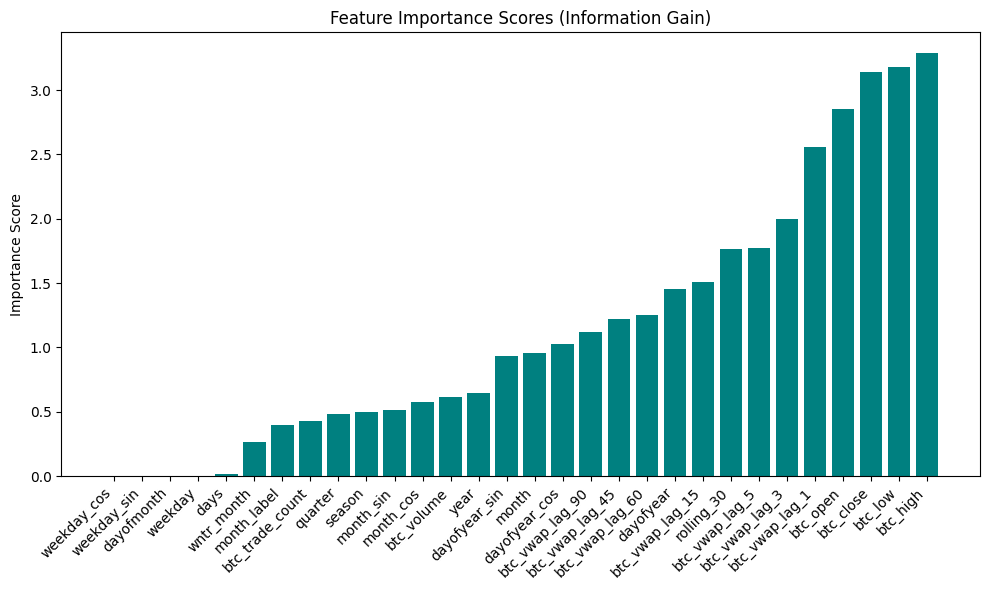

In [4]:
# Information Gain
ig = mutual_info_regression(X, y)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': train_data.columns, 'Importance': ig})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Changed to ascending=True

# Print the feature importance scores and the sorted features
print(feature_importance_df)
print(len(feature_importance_df))

# Plot a vertical bar chart of the feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')  # Changed to plt.bar
plt.ylabel('Importance Score')  # Changed to plt.ylabel
plt.title('Feature Importance Scores (Information Gain)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


            Feature  Importance
5   btc_trade_count    0.425281
13          quarter    0.479844
14           season    0.497776
28        month_sin    0.517103
29        month_cos    0.579267
4        btc_volume    0.614081
6              year    0.642440
24    dayofyear_sin    0.930920
7             month    0.956585
25    dayofyear_cos    1.023672
23  btc_vwap_lag_90    1.122572
21  btc_vwap_lag_45    1.221997
22  btc_vwap_lag_60    1.252786
9         dayofyear    1.454482
20  btc_vwap_lag_15    1.510271
16       rolling_30    1.761482
19   btc_vwap_lag_5    1.775575
18   btc_vwap_lag_3    1.993921
17   btc_vwap_lag_1    2.555108
0          btc_open    2.848595
3         btc_close    3.138004
2           btc_low    3.177001
1          btc_high    3.283944
23


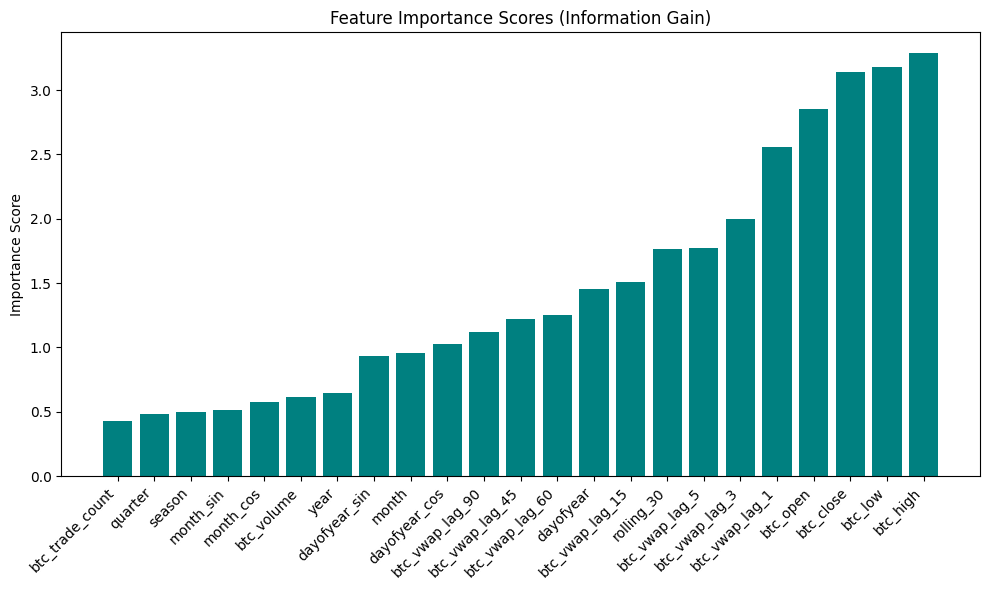

In [5]:
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] >= 0.4]
print(feature_importance_df)
print(len(feature_importance_df))
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')  # Changed to plt.bar
plt.ylabel('Importance Score')  # Changed to plt.ylabel
plt.title('Feature Importance Scores (Information Gain)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Fisher Score

/home/mert/.local/lib/python3.10/site-packages/skfeature/function/similarity_based/fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


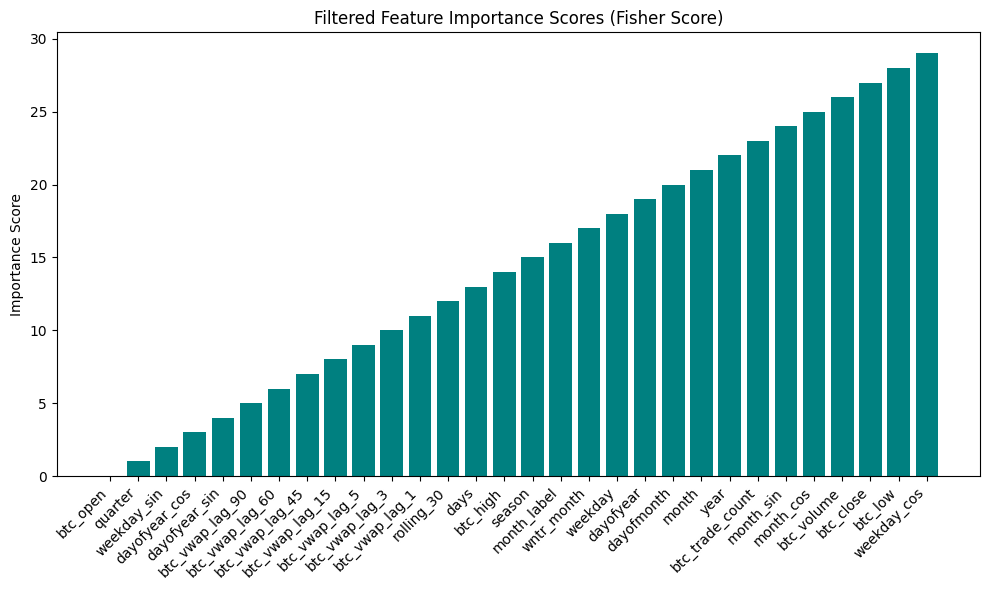

In [6]:
%matplotlib inline
X = train_data
y = target_data

# Assuming you have X and y defined earlier
X_np = np.array(X)
y_np = np.array(y)

# Calculating scores
ranks = fisher_score.fisher_score(X_np, y_np)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': train_data.columns, 'Importance': ranks})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Changed to ascending=True

# print(feature_importance_df)
# print(len(feature_importance_df))
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')  # Changed to plt.bar
plt.ylabel('Importance Score')  # Changed to plt.ylabel
plt.title('Filtered Feature Importance Scores (Fisher Score)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

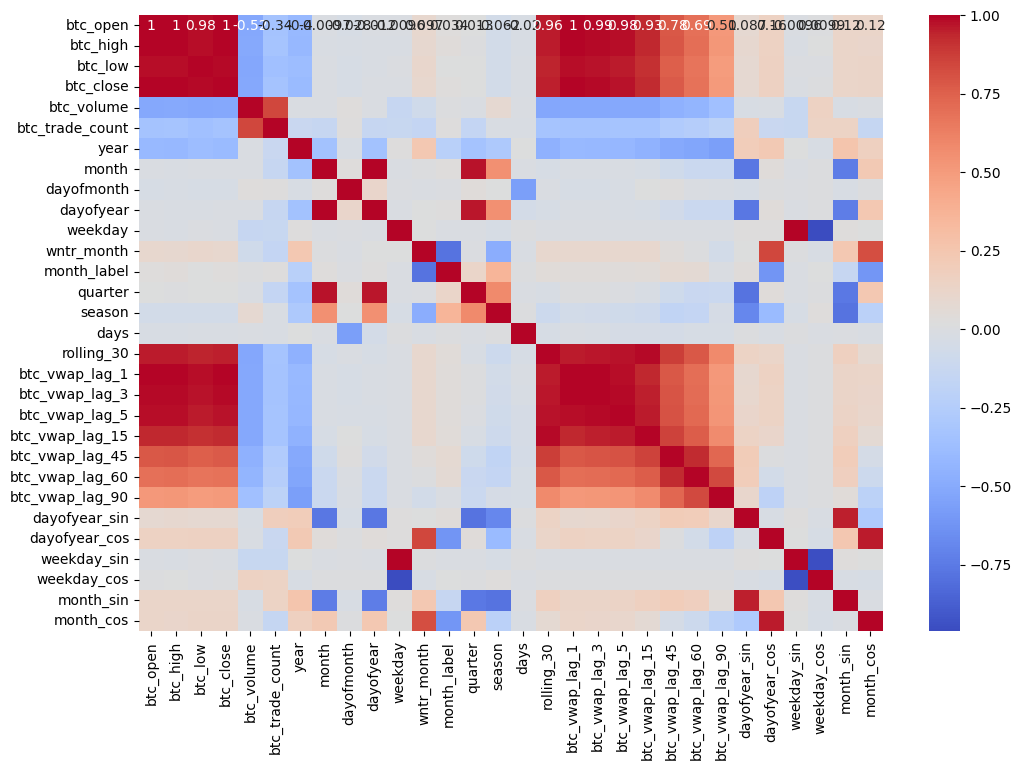

In [7]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

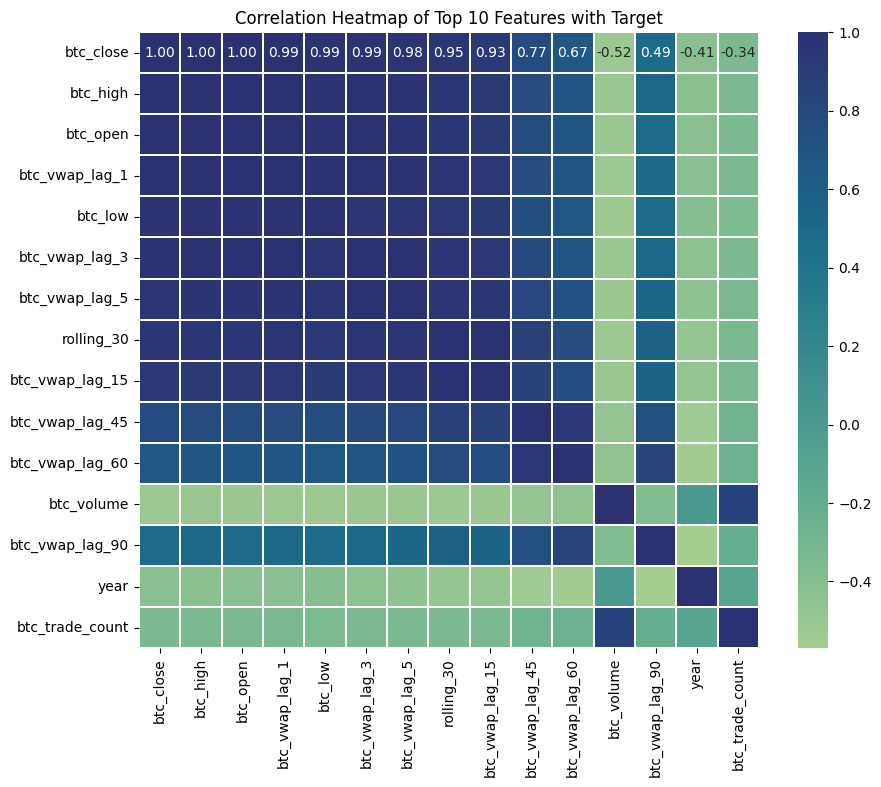

In [8]:
correlation_values = X.apply(lambda feature: np.abs(np.corrcoef(feature, y)[0, 1]))
sorted_features = correlation_values.sort_values(ascending=False)
k = 15
selected_features = sorted_features.index[:k]

plt.figure(figsize=(10, 8))
sns.heatmap(X[selected_features].corr(), annot=True, cmap='crest', fmt='.2f', linewidths=0.3)
plt.title('Correlation Heatmap of Top 10 Features with Target')
plt.show()


## Model Base Feature Selection

### Linear Regression

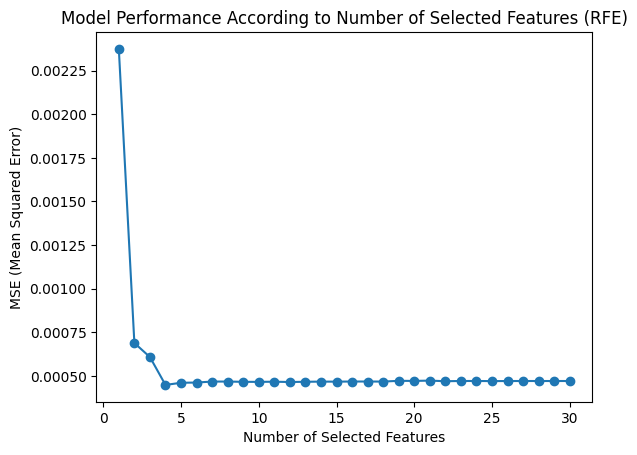

In [9]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)

# RFE için özellik sayılarını belirleyin
feature_numbers = range(1, len(X_train.columns) + 1)

mse_scores = []

# Her özellik sayısı için RFE uygulayın
for num_features in feature_numbers:
    rfe.n_features_to_select = num_features
    fit = rfe.fit(X_train, y_train)
    selected_features = X_train.columns[fit.support_]

    # Modeli seçilen özelliklerle eğitin ve test edin
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    
    # MSE hesaplayın
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Grafik oluşturun
plt.plot(feature_numbers, mse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('Model Performance According to Number of Selected Features (RFE)')
plt.show()


### Random Forest

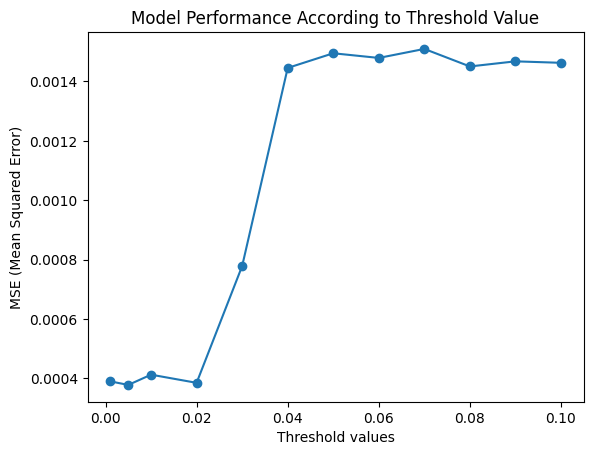

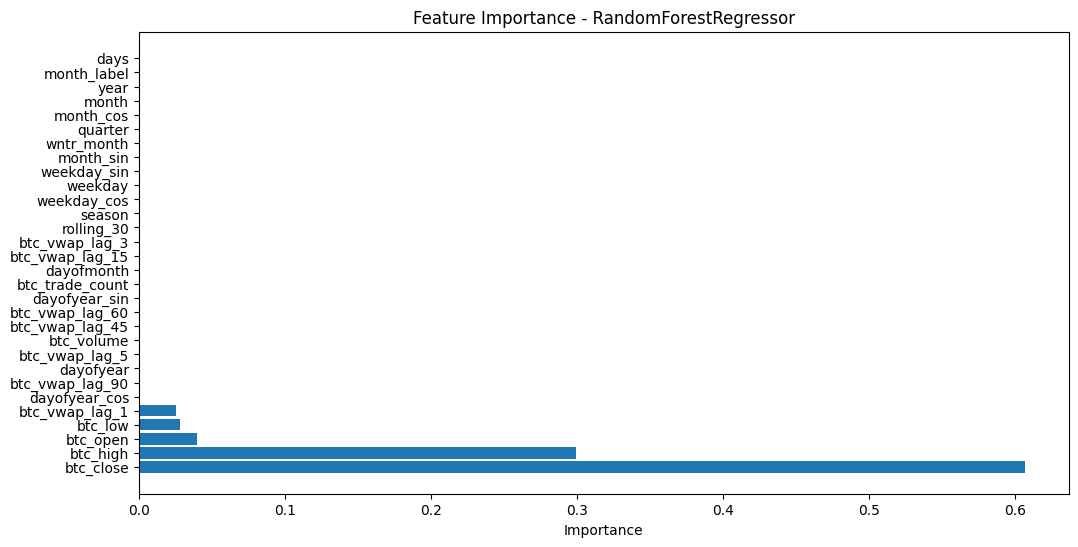

In [10]:
threshold_values = [0.001,0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

mse_scores = []

for threshold in threshold_values:

    model = RandomForestRegressor()

    model.fit(X_train, y_train)
    selected_features = X_train.columns[model.feature_importances_ > threshold]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)


plt.plot(threshold_values, mse_scores, marker='o')
plt.xlabel('Threshold values')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('Model Performance According to Threshold Value')
plt.show()

###############################################################

model.fit(X_train, y_train)

feature_importances = model.feature_importances_

# for feature, importance in zip(X_train.columns, feature_importances):
#     print(f"{feature}: {importance}")   

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - RandomForestRegressor')
plt.show()

### Boruta Feature Selection

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	17
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	17
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	17
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	17
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	17
I

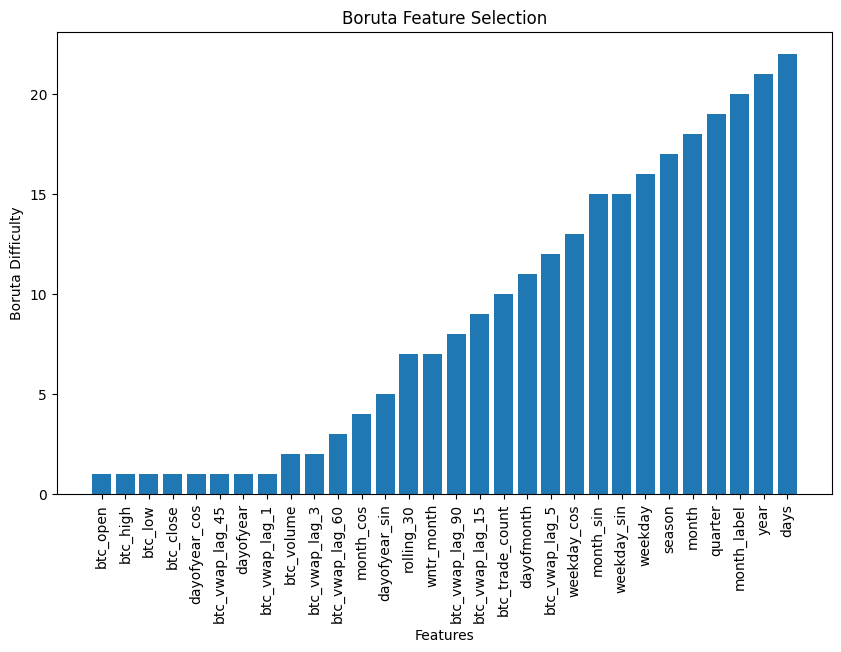

Selected Features: Index(['btc_open', 'btc_high', 'btc_low', 'btc_close', 'dayofyear',
       'btc_vwap_lag_1', 'btc_vwap_lag_45', 'dayofyear_cos'],
      dtype='object')


In [11]:
model = RandomForestRegressor()

boruta_selector = BorutaPy(model, n_estimators='auto', verbose=2)
boruta_selector.fit(X_train.values, y_train.values)

# Boruta'nın her iterasyonundaki en iyi özelliklerin zorluk değerlerini alın
feature_ranks = np.argsort(boruta_selector.ranking_)
feature_difficulty = np.sort(boruta_selector.ranking_)

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_difficulty)), feature_difficulty, align='center')
plt.xticks(range(len(feature_difficulty)), X_train.columns[feature_ranks], rotation=90)
plt.xlabel('Features')
plt.ylabel('Boruta Difficulty')
plt.title('Boruta Feature Selection')
plt.show()

selected_features = X_train.columns[boruta_selector.support_]
print("Selected Features:", selected_features)


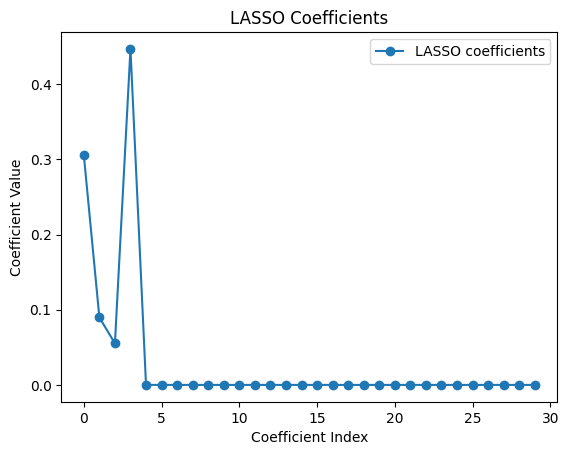

In [12]:
lasso = Lasso(alpha=0.1)

lasso.fit(X, y)

plt.plot(lasso.coef_, marker='o', label='LASSO coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.title('LASSO Coefficients')
plt.show()